# Linear-Regression(TensorFlow)
>* 몸무게와 하루 섭취하는 칼로리와의 상관관계

## 함수 설정
>* hypothesis = Wx + b
>* cost = 실제 결과값과 예측값과의 차이
>* optimizer = GradientDescent 

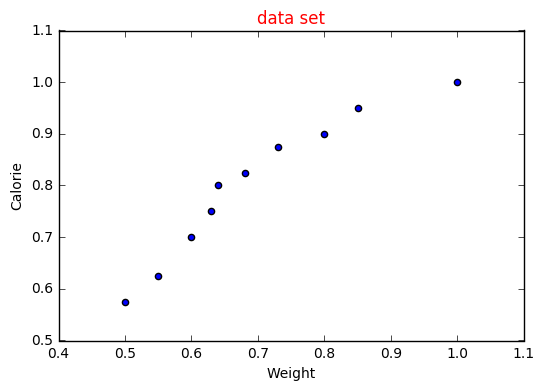

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random 
import numpy as np
import pandas as pd
%matplotlib inline
#데이터 설정 x_data : 몸무게  y_data : 하루 섭취 칼로리
x_data = np.array([50.,55.,60.,63.,64.,68.,73.,80.,85.,100.])
y_data = np.array([2300.,2500.,2800.,3000.,3200.,3300.,3500.,3600.,3800.,4000.])

x_normed = x_data / x_data.max(axis=0)
y_normed = y_data / y_data.max(axis=0)




plt.scatter(x_normed,y_normed)
plt.xlabel('Weight')
plt.ylabel('Calorie')
plt.title('data set',color = 'r')
plt.show()

In [3]:
#make parameter
x = tf.placeholder(shape=[None],dtype=tf.float32)
y = tf.placeholder(shape=[None],dtype=tf.float32)
w = tf.Variable(tf.random_normal([1]),dtype = tf.float32)
b = tf.Variable(tf.random_normal([1]),dtype = tf.float32)
hypothesis = w*x+b
cost = tf.reduce_mean(tf.square(hypothesis-y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

cost:  0.154258
cost:  0.0032732
cost:  0.0028529
cost:  0.00278539
cost:  0.00272225
cost:  0.00266247
cost:  0.00260589
cost:  0.00255232
cost:  0.00250162
cost:  0.00245361


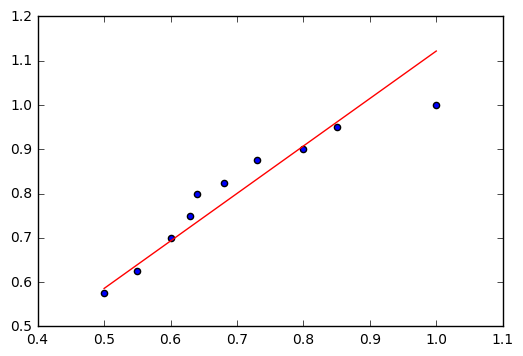

In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(1000):
    h_v,c_v,o_v = sess.run([hypothesis,cost,optimizer],feed_dict={x:x_normed,y:y_normed})
    if i % 100 == 0:
        print('cost: ', c_v)

plt.scatter(x_normed,y_normed)
plt.plot(x_normed,sess.run(hypothesis,feed_dict={x:x_normed,y:y_normed}),'r')
plt.show()